# Orthogonal Projections and Their Applications

In [5]:
using LinearAlgebra, Statistics
using Plots, Distributions, Random, Statistics
gr(fmt = :png, size = (900, 500))

Activated /Users/yurimatsumura/QuantEcon with Julia/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.6.0


Plots.GRBackend()

In [7]:
?isnan

search: isnan IsoNormalCanon ZeroMeanIsoNormalCanon



```
isnan(f) -> Bool
```

Test whether a number value is a NaN, an indeterminate value which is neither an infinity nor a finite number ("not a number").


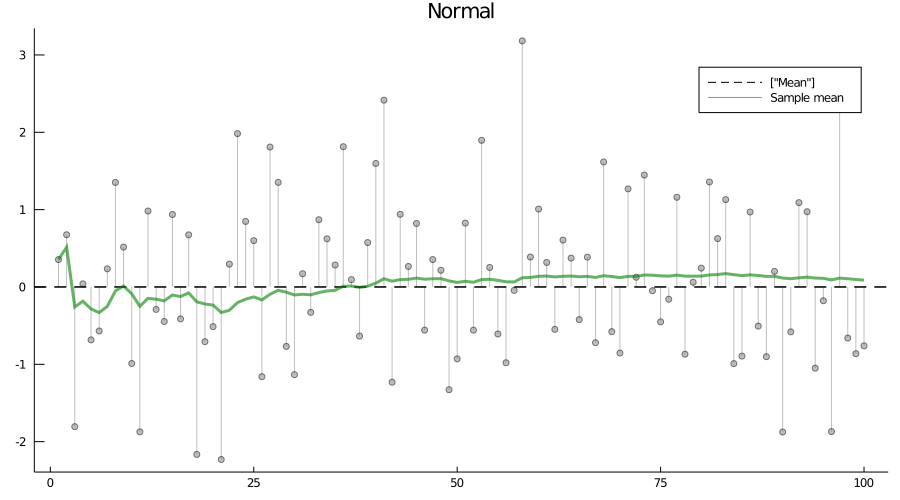

In [21]:
function ksl(distribution, n =100)
    title = nameof(typeof(distribution))
    observations = rand(distribution, n)
    sample_means = cumsum(observations) ./ (1:n)
    μ = mean(distribution)
    plot(repeat((1:n)', 2), [zeros(1, n); observations'], label = "", color = :grey, alpha = 0.5)
    plot!(1:n, observations, color = :gray, markershape = :circle, alpha = 0.5, label = "", linewidth = 0)
    if !isnan(μ)
        hline!([μ], color = :black, linewidth = 1.5, linestyle = :dash, grid = false, label = ["Mean"])
    end
    plot!(1:n, sample_means, linewidth = 3, alpha = 0.6, color = :green, label = "Sample mean")
    return plot!(title = title)
end


ksl(Normal())

In [22]:
Random.seed!(0); # reproducible results

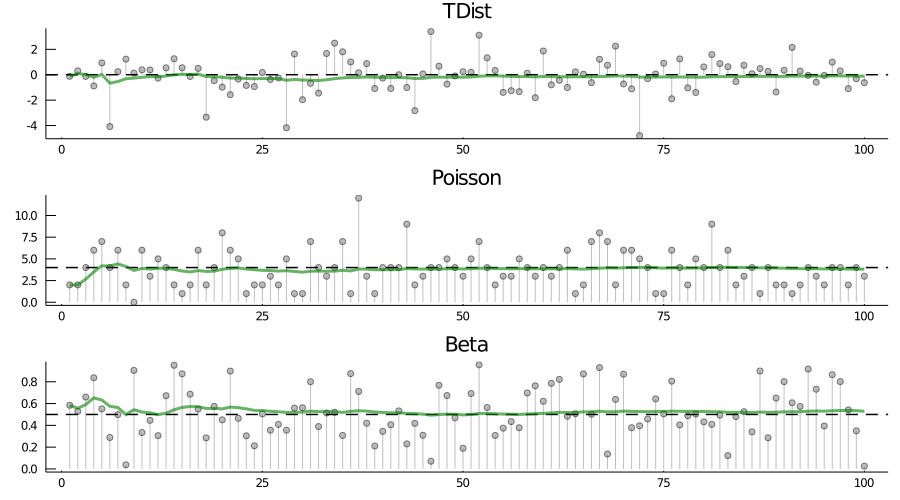

In [23]:
plot(ksl.(sample(distributions, 3, replace = false))..., layout = (3, 1), legend = false)


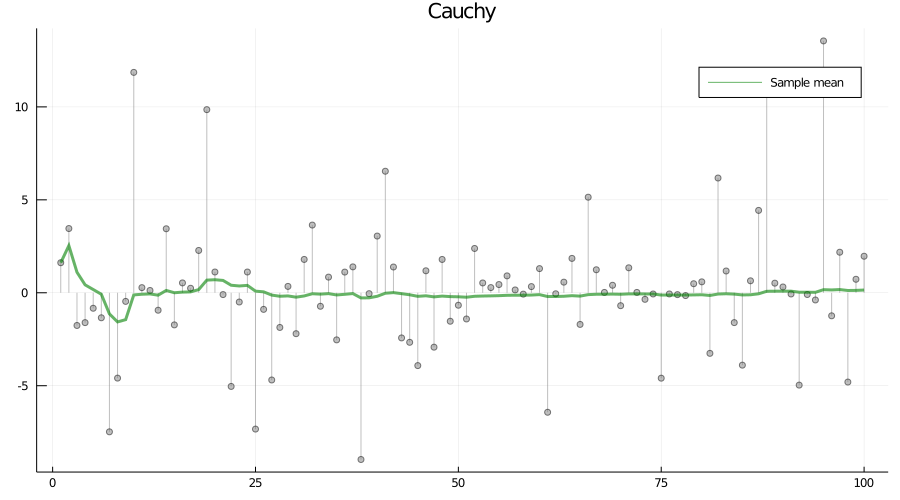

In [24]:
Random.seed!(0); # reproducible results
ksl(Cauchy())

In [26]:
?cumsum

search: cumsum cumsum! ContinuousMatrixDistribution



```
cumsum(A; dims::Integer)
```

Cumulative sum along the dimension `dims`. See also [`cumsum!`](@ref) to use a preallocated output array, both for performance and to control the precision of the output (e.g. to avoid overflow).

# Examples

```jldoctest
julia> a = [1 2 3; 4 5 6]
2×3 Array{Int64,2}:
 1  2  3
 4  5  6

julia> cumsum(a, dims=1)
2×3 Array{Int64,2}:
 1  2  3
 5  7  9

julia> cumsum(a, dims=2)
2×3 Array{Int64,2}:
 1  3   6
 4  9  15
```

---

```
cumsum(x::AbstractVector)
```

Cumulative sum a vector. See also [`cumsum!`](@ref) to use a preallocated output array, both for performance and to control the precision of the output (e.g. to avoid overflow).

# Examples

```jldoctest
julia> cumsum([1, 1, 1])
3-element Array{Int64,1}:
 1
 2
 3

julia> cumsum([fill(1, 2) for i in 1:3])
3-element Array{Array{Int64,1},1}:
 [1, 1]
 [2, 2]
 [3, 3]
```


In [27]:
?bar

search: bar barh bar! barh! barhist barhist! baremodule SubArray GlobalRef



```
bar(x,y)
bar!(x,y)
```

Make a bar plot of y vs x.

# Arguments

  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Examples

```julia-repl
julia> bar([1,2,3],[4,5,6],fillcolor=[:red,:green,:blue],fillalpha=[0.2,0.4,0.6])
julia> bar([(1,4),(2,5),(3,6)])
```


In [43]:
binomial_pdf(n) =
    bar(0:n, pdf.(Binomial(n), 0:n),
        xticks = 0:10, ylim = (0, 1), yticks = 0:0.1:1,
        label = "Binomial($n, 0.5)", legend = :topleft)

binomial_pdf (generic function with 1 method)

In [46]:
binomial_pdf(1)

ErrorException: could not load library "@rpath/libRmath-julia.dylib"
dlopen(@rpath/libRmath-julia.dylib, 1): image not found

In [52]:
using StatsPlots

function simulation1(distribution, n = 250, k = 10000)
    σ = std(distribution)
    y = rand(distribution, n, k)
    y .-= mean(distribution)
    y = mean(y, dims = 1)
    y = √n * vec(y)
    density(y, label = "Empirical Distribution")
    return plot!(Normal(0, σ), linestyle = :dash, color = :black,
                 label = "Normal(0.00, $(σ^2))")
end

simulation1 (generic function with 3 methods)

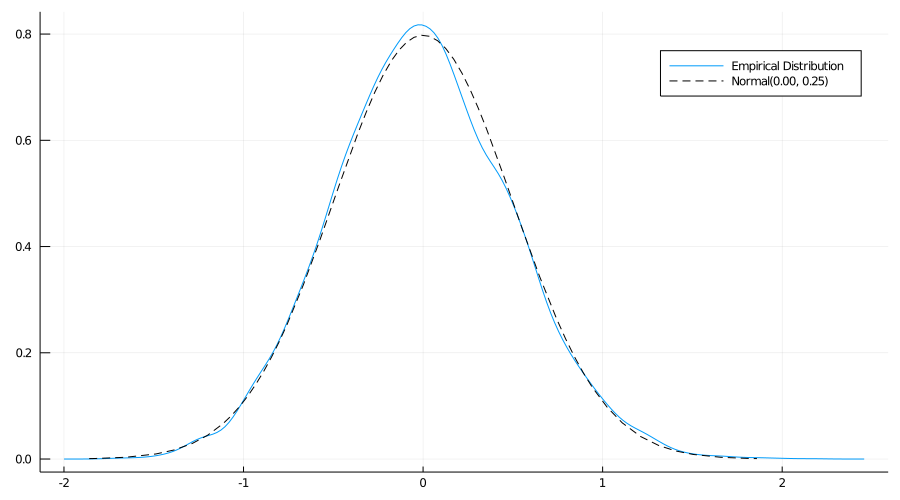

In [54]:
simulation1(Exponential(0.5))

## Exercise 1 

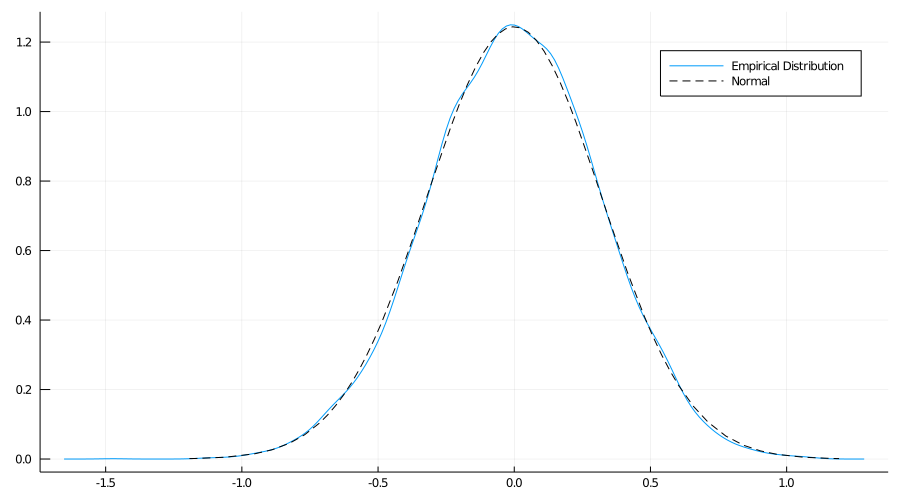

In [132]:
using StatsPlots, ForwardDiff

function simulation_cmt(distribution, g; n =10000, k = 10000)
    Dg = x -> ForwardDiff.derivative(g, x)
    μ , σ = mean(distribution), std(distribution)
    y = rand(distribution, n, k)
    y = mean(y, dims = 1)
    cmt = √n * (g.(vec(y)) .- g.(μ)) 
    density(cmt, label = "Empirical Distribution")
    return plot!(Normal(0, Dg(μ).* σ), linestyle = :dash, color = :black, label = "Normal")
end

simulation_cmt(Uniform(0,π/2),sin)


## Exercise 2

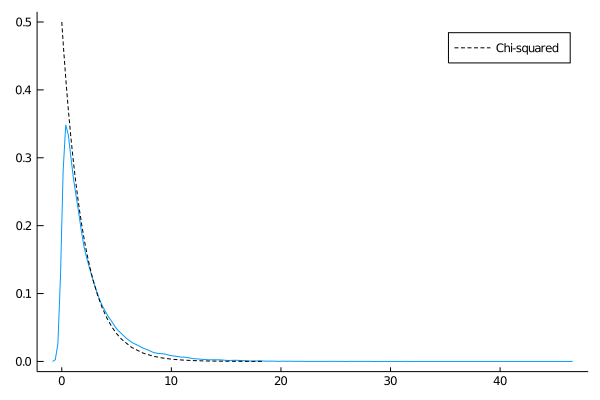

In [82]:
using StatsPlots
using LinearAlgebra, Statistics
using Plots, Distributions, Random, Statistics


Random.seed!(0)


function simulation_chi(; w = Uniform(-1,1), u = Uniform(-2,2), n = 2500, k = 50_000)
    σ_w = var(w)
    σ_u = var(u)
    Σ = [σ_w σ_w; σ_w σ_w + σ_u]
    Q = inv(sqrt(Σ))
    
    x_1 = rand(w, n, k)
    x_1 = mean(x_1, dims = 1)
    
    x_2 = rand(w, n, k) + rand(u, n, k)
    x_2 = mean(x_2, dims = 1)

    X = [x_1 ; x_2]
    y = n * sum(abs2, Q*X, dims = 1)
    density(vec(y), label = "")
    return plot!(Chisq(2), color = :black, linestyle = :dash,
                 label = "Chi-squared", grid = false)
end

simulation_chi()

### Comment
The following is a solution in QuantEcon. Why is the approximation in QuantEcon accurate? 

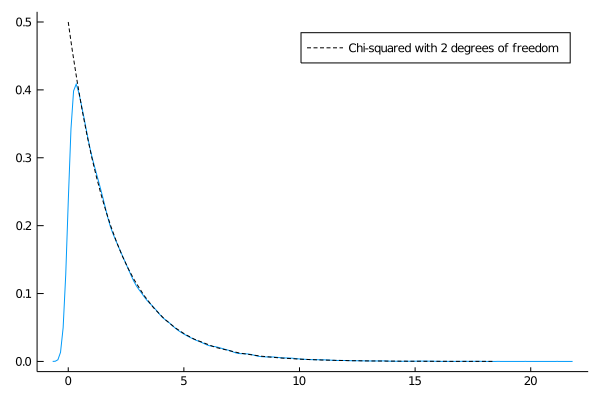

In [72]:
using StatsPlots
using LinearAlgebra, Statistics
using Plots, Distributions, Random, Statistics

Random.seed!(0);


n = 250
k = 50_000
dw = Uniform(-1, 1)
du = Uniform(-2, 2)
    vw = var(dw)
    vu = var(du)
    Σ = [vw    vw
         vw vw + vu]
    Q = inv(sqrt(Σ))
    function generate_data(dw, du, n)
        dw = rand(dw, n)
        X = [dw dw + rand(du, n)]
        return sqrt(n) * mean(X, dims = 1)
    end
    X = mapreduce(x -> generate_data(dw, du, n), vcat, 1:k)
    X = Q * X'
    X = sum(abs2, X, dims = 1)
    X = vec(X)
    density(X, label = "")
    plot!(Chisq(2), color = :black, linestyle = :dash,
                 label = "Chi-squared with 2 degrees of freedom", grid = false)

exercise2()